# Assignment 01:
- Implementation of KNN 
- Testing on Boston Housing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Task 1: Load and Data Analysis

### 1.1 Loading Data

In [2]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(data_id=531)
boston

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [3]:
# Creating DataFrame
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['target'] = boston.target
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# removing categorical features as instructed
catagorical_features = df.select_dtypes(include=['category'])
_ = df.drop(columns=catagorical_features, inplace=True)
df.head(5)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


### 1.2.1 Correlation Heatmap

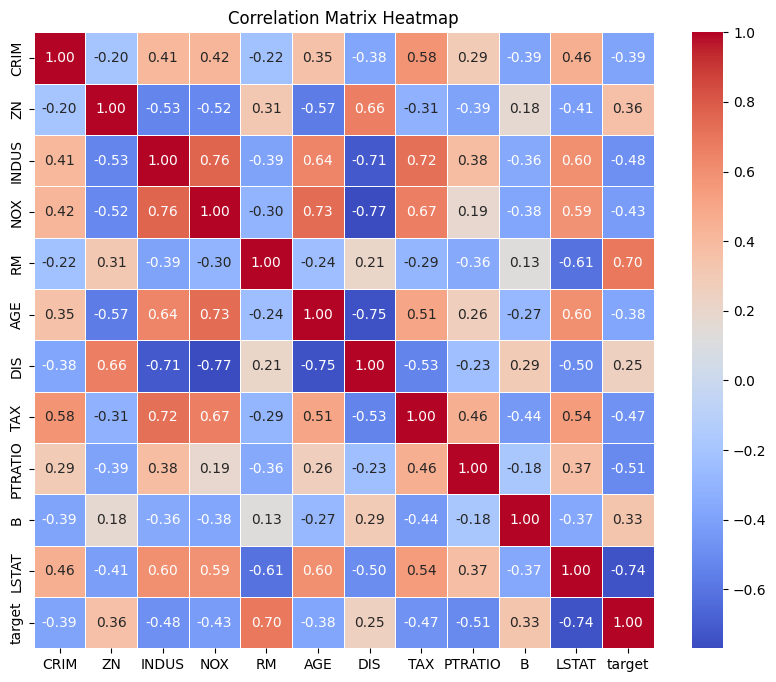

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f",linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 1.2.2 Pairplot of selected features

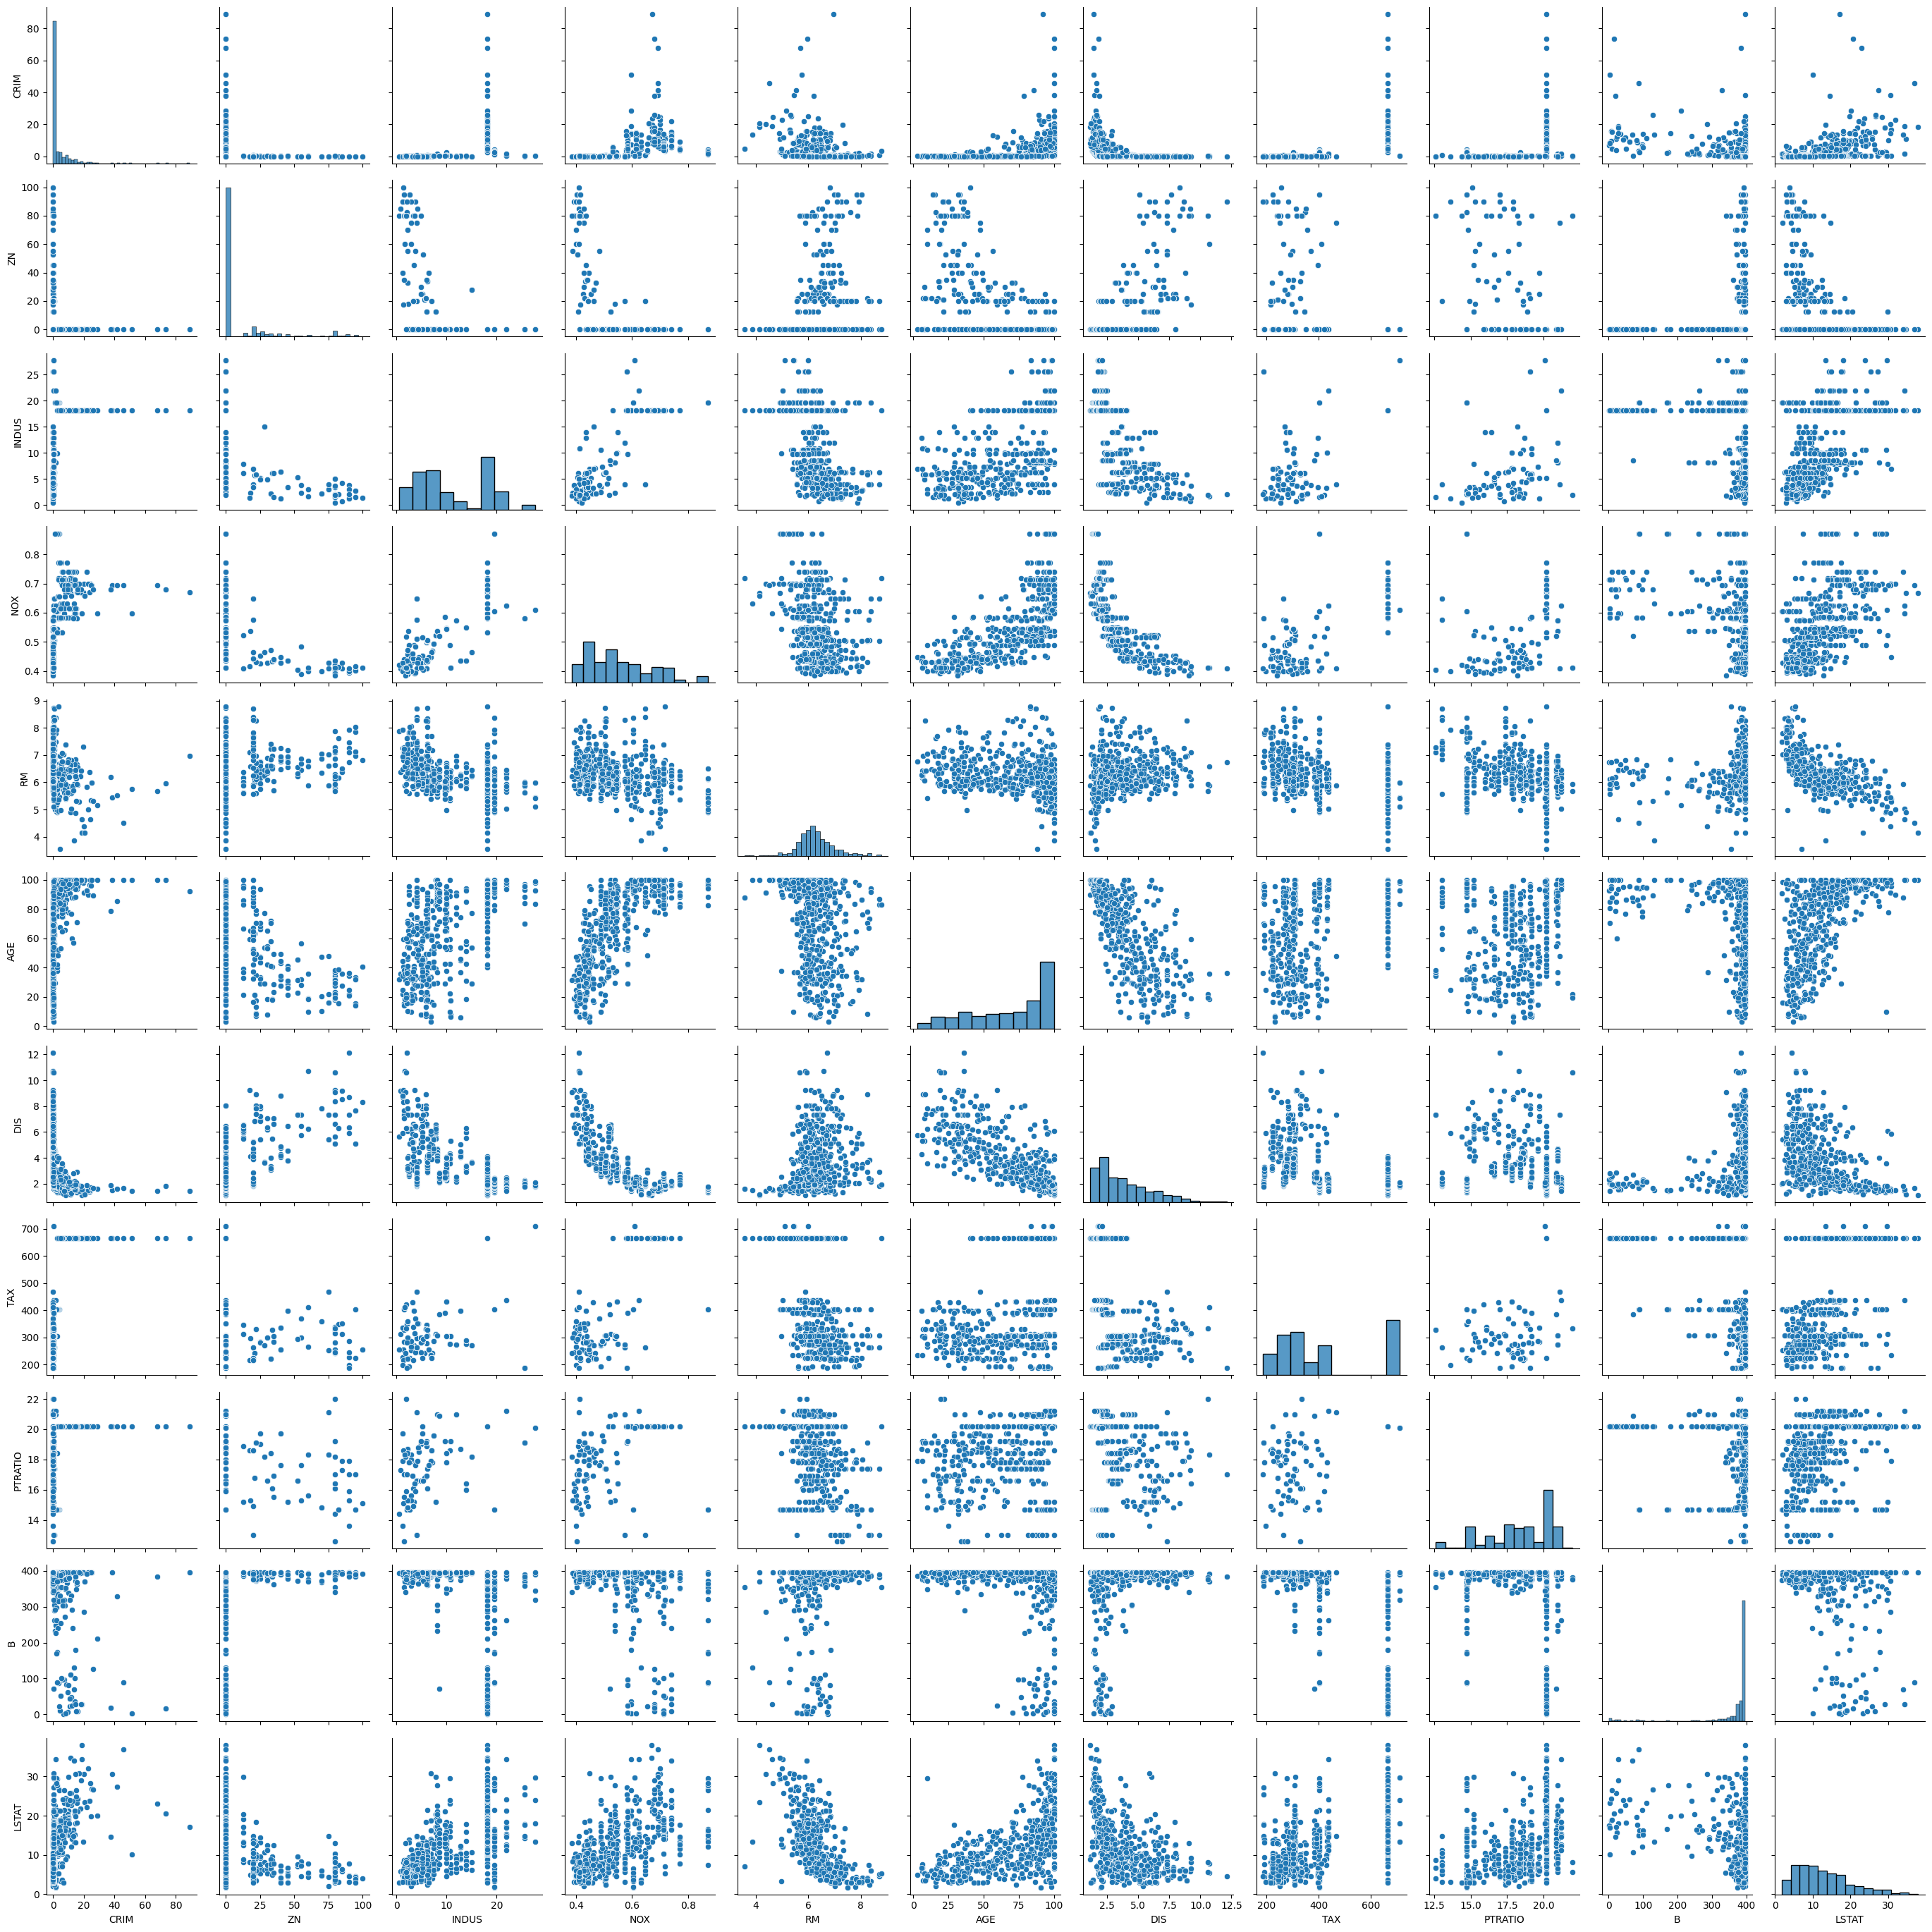

In [6]:
selected_features = df.columns[:-1]
sns.pairplot(df[selected_features])
plt.tight_layout()
plt.show()

### 1.3 Feature vs target

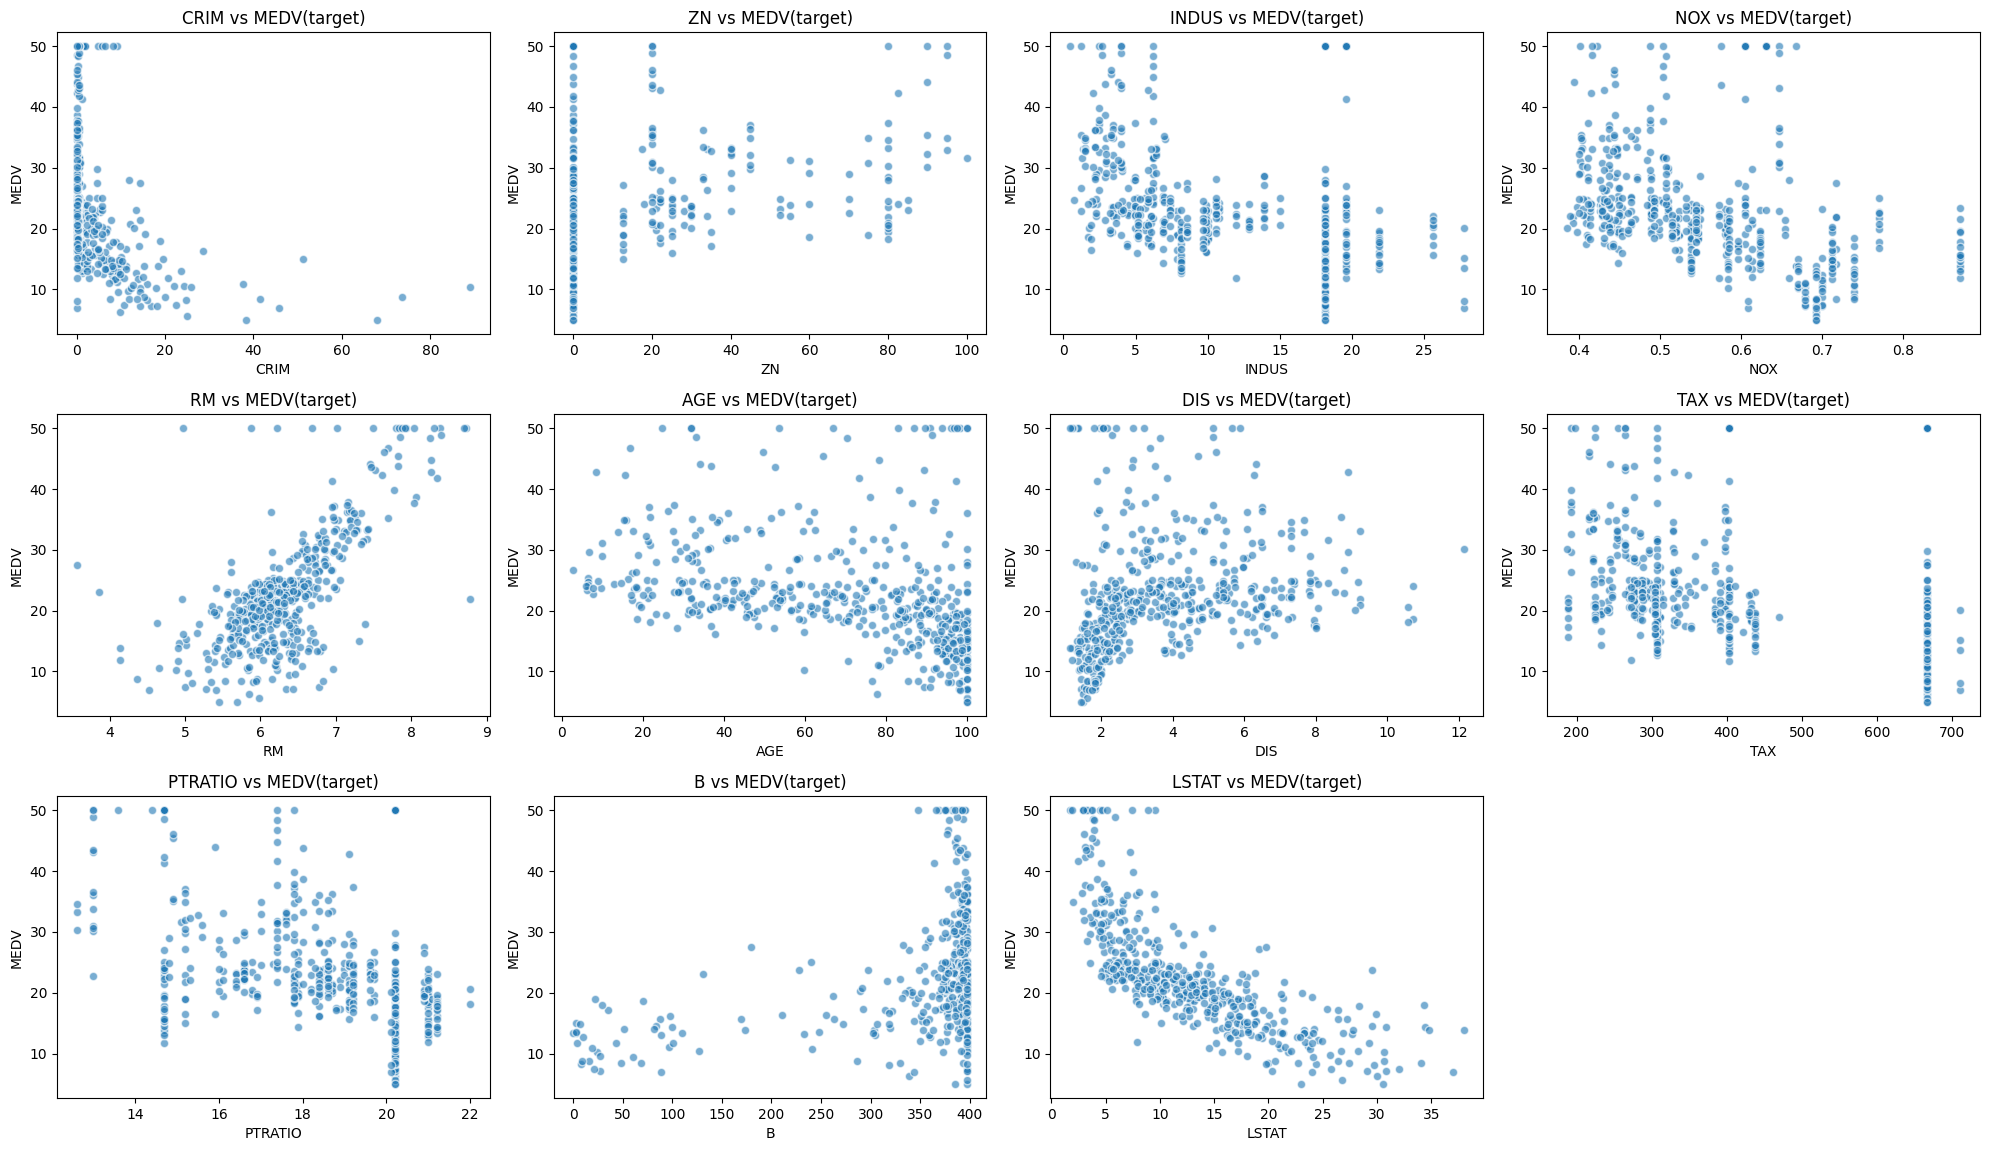

In [7]:
feature_columns = df.columns.copy()[:-1]

plt.figure(figsize=(20, 15))
for i, feature in enumerate(feature_columns):
    plt.subplot(4, 4, i + 1) 
    plt.scatter(df[feature], df['target'], alpha=0.6, edgecolors='w')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.title(f'{feature} vs MEDV(target)')

plt.tight_layout()
plt.show()

### 1.4 Distribution of Target

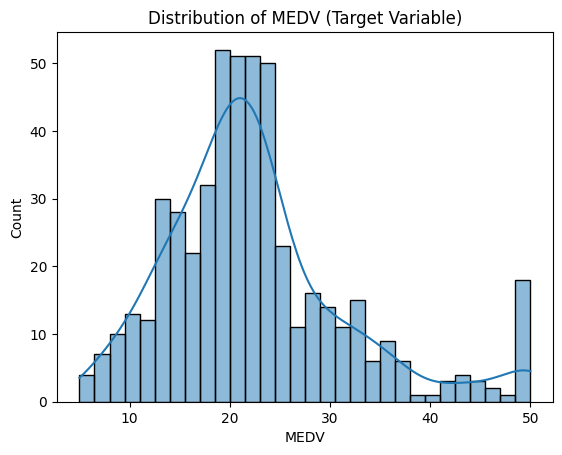

In [8]:
import seaborn as sns

sns.histplot(df['target'], kde=True, bins=30)
plt.xlabel('MEDV')
plt.title('Distribution of MEDV (Target Variable)')
plt.show()

# Task 2: Scaling and Splitting the Data
Though in instruction the Min-Max Scaling is written before the splitting
<br/>
But we shall split first as peaking in the Test Data is wrong

### 2.2 Spliting The Data

In [9]:
X = df[df.columns[:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### 2.1 Scaling using Min-Max Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

Scaling test set

In [12]:
X_test = scaler.transform(X_test)

# Task 3: Implementing simple average KNN

### Implementing From Scratch

In [13]:
class KNearestNeighbourSimpleRegressor:
    @staticmethod
    def _minkowsky_distance_factory(p: int):
        def distance(x1, x2):
            return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)
        return distance

    @staticmethod
    def _cosine_distance(x1, x2):
        dot = np.dot(x1, x2)
        norms = np.linalg.norm(x1) * np.linalg.norm(x2)
        return 1 - dot / norms if norms != 0 else 1

    def __init__(self, k=3, distance_metric='euclidean', p=2):
        self.k = k
        self.p = p
        self.distance_func = {
            'euclidean': self._minkowsky_distance_factory(2),
            'manhattan': self._minkowsky_distance_factory(1),
            'minkowsky': self._minkowsky_distance_factory(p),
            'cosine': self._cosine_distance
        }[distance_metric]

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train.ravel()

    def _predict_single(self, x_test):
        distances = np.array([self.distance_func(x_test, x_train_i) for x_train_i in self.X_train])
        indices = np.argsort(distances)[:self.k]
        y_neigh = self.y_train[indices]
        return np.average(y_neigh)

    def predict(self, X_test):
        return np.array([self._predict_single(x) for x in X_test])


### Evaluation

In [14]:
from sklearn.metrics import r2_score

k_values = [3, 5, 7, 9, 11]
distance_metrics = ['euclidean', 'manhattan', 'cosine']
results = []

for k in k_values:
    for metric in distance_metrics:
        model = KNearestNeighbourSimpleRegressor(k=k, distance_metric=metric)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        results.append((k, metric, r2))

Creating Table

In [15]:
df_results_my_impl_basic = pd.DataFrame(results, columns=['k', 'Distance Metric', 'R2 Score'])

df_results_my_impl_basic = df_results_my_impl_basic.pivot(index='k', columns='Distance Metric', values='R2 Score').round(4)
df_results_my_impl_basic

Distance Metric,cosine,euclidean,manhattan
k,,,
3,0.8233,0.8244,0.8470
5,0.8205,0.8234,0.8158
7,0.8069,0.8135,0.8179
9,0.7653,0.7705,0.8034
11,0.7367,0.7339,0.7783


# Task 4: Compare with Sklearn's Basic KNN

### Getting Best Result From My Model

In [16]:
best_result_simple_avg = df_results_my_impl_basic.stack().idxmax()
best_k_simple_avg, best_metric_simple_avg = best_result_simple_avg
best_score_simple_avg = df_results_my_impl_basic.loc[best_k_simple_avg, best_metric_simple_avg]
print(f"Best custom KNN Simple Regressor: k={best_k_simple_avg}, metric='{best_metric_simple_avg}', R-squared={best_score_simple_avg:.4f}")

Best custom KNN Simple Regressor: k=3, metric='manhattan', R-squared=0.8470


### training with Sklearn

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

sk_model = KNeighborsRegressor(
    n_neighbors=best_k_simple_avg,
    metric=best_metric_simple_avg,
    weights='uniform',
    algorithm='brute'  # Force no KDTree/BallTree
)

sk_model.fit(X_train, y_train)

y_pred_sk = sk_model.predict(X_test)

r2_sk_simple_avg = r2_score(y_test, y_pred_sk)
print(f"scikit-learn KNN: R-squared = {r2_sk_simple_avg:.4f}")


scikit-learn KNN: R-squared = 0.8470


### Comparision

In [18]:
print('KNN implementation: Simple Average :')
print(f'My Implementation R-squared: {best_score_simple_avg}')
print(f'scikit-learn Implementation R-squared: {r2_sk_simple_avg:.3f}')

KNN implementation: Simple Average :
My Implementation R-squared: 0.847
scikit-learn Implementation R-squared: 0.847


# Task 5: Weighted KNN

### Implementation

In [19]:
# We can just take from Simple Regressor version
class KNearestNeighbourWeightedRegressor(KNearestNeighbourSimpleRegressor):
    def __init__(self, k=3, distance_metric='euclidean', p=2):
        super().__init__(k=k, distance_metric=distance_metric, p=p)
    
    # overloading the prediction method for single case
    def _predict_single(self, x_test):
        distances = np.array([self.distance_func(x_test, x_train_i) for x_train_i in self.X_train])
        indices = np.argsort(distances)[:self.k]
        selected_distances = distances[indices]
        y_neigh = self.y_train[indices]

        if np.any(selected_distances == 0):
            return y_neigh[selected_distances == 0][0]
        
        weights = np.array([1 / d if d != 0 else 1e9 for d in selected_distances])
        return np.dot(weights, y_neigh) / np.sum(weights)

### Evaluation

In [20]:
k_values = [3, 5, 7, 9, 11]
distance_metrics = ['euclidean', 'manhattan', 'cosine']
results_scaled = []

for k in k_values:
    for metric in distance_metrics:
        model = KNearestNeighbourWeightedRegressor(k=k, distance_metric=metric)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        results_scaled.append((k, metric, r2))

In [21]:
df_results_my_impl_scaled = pd.DataFrame(results_scaled, columns=['k', 'Distance Metric', 'R2 Score'])

df_results_my_impl_scaled = df_results_my_impl_scaled.pivot(index='k', columns='Distance Metric', values='R2 Score').round(4)
df_results_my_impl_scaled

Distance Metric,cosine,euclidean,manhattan
k,,,
3,0.8487,0.8393,0.8574
5,0.8607,0.8471,0.8375
7,0.8592,0.8386,0.8431
9,0.8401,0.8094,0.8324
11,0.8250,0.7819,0.8135


# Task 6: Compare with Sklearn

### Getting Best Result From My Model

In [22]:
best_result_scaled = df_results_my_impl_scaled.stack().idxmax()
best_k_scaled, best_metric_scaled = best_result_scaled
best_score_scaled = df_results_my_impl_scaled.loc[best_k_scaled, best_metric_scaled]
print(f"Best custom KNN Scaled Regressor: k={best_k_scaled}, metric='{best_metric_scaled}', R-squared={best_score_scaled:.4f}")

Best custom KNN Scaled Regressor: k=5, metric='cosine', R-squared=0.8607


In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

sk_model = KNeighborsRegressor(
    n_neighbors=best_k_scaled,
    metric=best_metric_scaled,
    weights='uniform',
    algorithm='brute'  # Force no KDTree/BallTree
)

sk_model.fit(X_train, y_train)

y_pred_sk = sk_model.predict(X_test)

r2_sk_simple_avg = r2_score(y_test, y_pred_sk)
print(f"scikit-learn KNN: R-squared = {r2_sk_simple_avg:.4f}")


scikit-learn KNN: R-squared = 0.8205


### Compute All R2 values from sklearn

In [24]:
# Simple (uniform weights)
results_simple = []

# Weighted (distance weights)
results_weighted = []

for k in k_values:
    for metric in distance_metrics:
        # Simple KNN (uniform weights)
        knn_simple = KNeighborsRegressor(n_neighbors=k, metric=metric, algorithm='brute', weights='uniform')
        knn_simple.fit(X_train, y_train)
        y_pred = knn_simple.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        results_simple.append((k, metric, r2))

        # Weighted KNN (distance weights)
        knn_weighted = KNeighborsRegressor(n_neighbors=k, metric=metric, algorithm='brute', weights='distance')
        knn_weighted.fit(X_train, y_train)
        y_pred_w = knn_weighted.predict(X_test)
        r2_w = r2_score(y_test, y_pred_w)
        results_weighted.append((k, metric, r2_w))

# Creating DataFrame Objects
df_sklearn_simple = pd.DataFrame(results_simple, columns=['k', 'Distance Metric', 'R2 Score'])
df_sklearn_simple = df_sklearn_simple.pivot(index='k', columns='Distance Metric', values='R2 Score').round(4)

df_sklearn_weighted = pd.DataFrame(results_weighted, columns=['k', 'Distance Metric', 'R2 Score'])
df_sklearn_weighted = df_sklearn_weighted.pivot(index='k', columns='Distance Metric', values='R2 Score').round(4)


# Task 7: Reporting And Visualization

### R2 values of my implementations

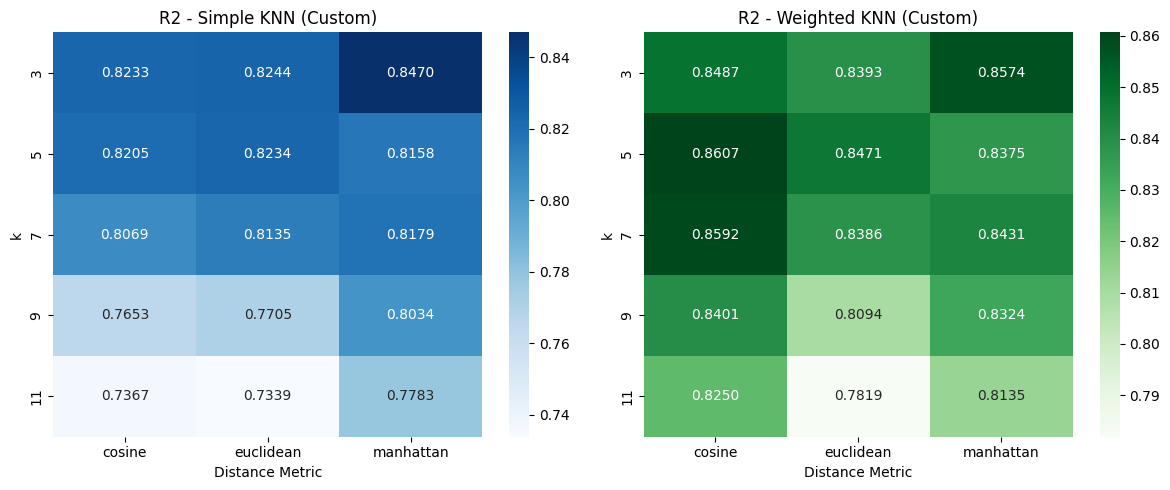

In [25]:
plt.figure(figsize=(12, 5))

# Simple KNN
plt.subplot(1, 2, 1)
sns.heatmap(df_results_my_impl_basic, annot=True, cmap='Blues', fmt=".4f")
plt.title('R2 - Simple KNN (Custom)')

# Weighted KNN
plt.subplot(1, 2, 2)
sns.heatmap(df_results_my_impl_scaled, annot=True, cmap='Greens', fmt=".4f")
plt.title('R2 - Weighted KNN (Custom)')

plt.tight_layout()
plt.show()

### R2 vs K

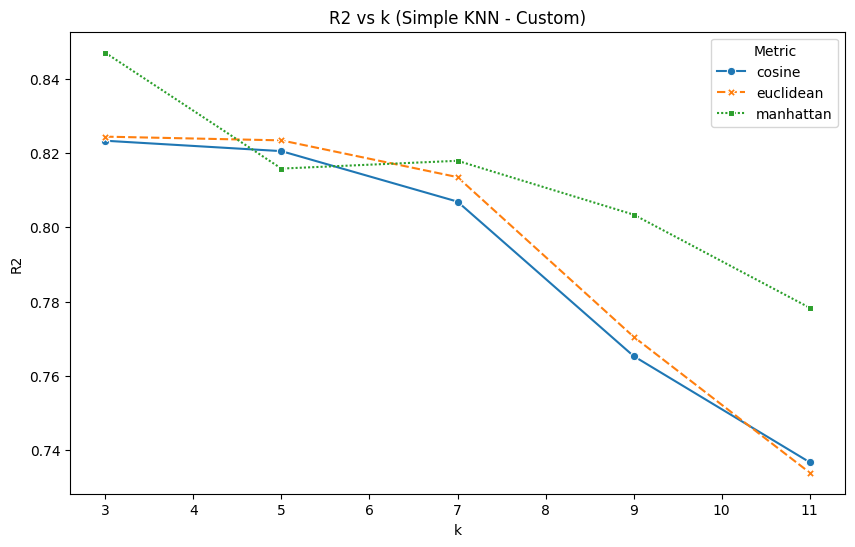

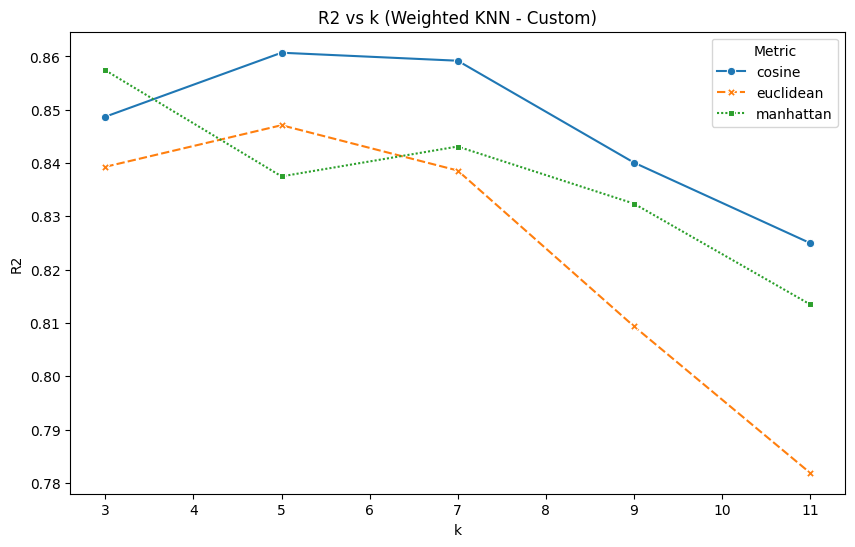

In [26]:
df_simple_melt = df_results_my_impl_basic.reset_index().melt(id_vars='k', var_name='Metric', value_name='R2')
df_weighted_melt = df_results_my_impl_scaled.reset_index().melt(id_vars='k', var_name='Metric', value_name='R2')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_simple_melt, x='k', y='R2', hue='Metric', style='Metric', markers=True)
plt.title("R2 vs k (Simple KNN - Custom)")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_weighted_melt, x='k', y='R2', hue='Metric', style='Metric', markers=True)
plt.title("R2 vs k (Weighted KNN - Custom)")
plt.show()

### Sklearn's models performance

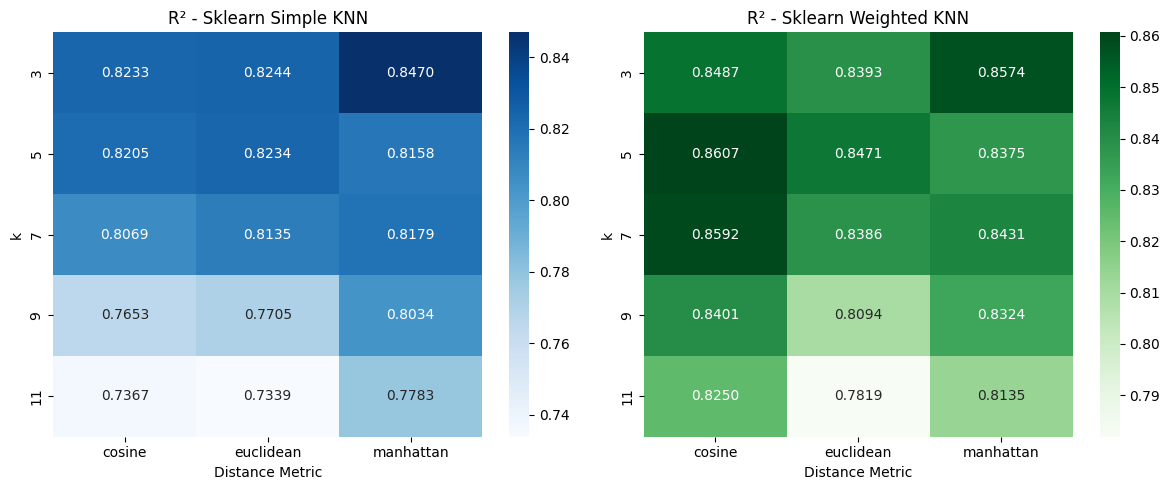

In [27]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(df_sklearn_simple, annot=True, cmap='Blues', fmt=".4f")
plt.title('R² - Sklearn Simple KNN')

plt.subplot(1, 2, 2)
sns.heatmap(df_sklearn_weighted, annot=True, cmap='Greens', fmt=".4f")
plt.title('R² - Sklearn Weighted KNN')

plt.tight_layout()
plt.show()


### Sklearn vs my implementation scaled version

In [28]:
best_k, best_metric = df_results_my_impl_scaled.stack().idxmax()
custom_r2 = df_results_my_impl_scaled.loc[best_k, best_metric]
sklearn_r2 = df_sklearn_weighted.loc[best_k, best_metric]

print(f"🔍 Best Weighted KNN Config: k={best_k}, metric='{best_metric}'")
print(f"Custom Weighted R²: {custom_r2:.4f}")
print(f"Sklearn Weighted R²: {sklearn_r2:.4f}")
print(f"Difference: {custom_r2 - sklearn_r2:+.4f}")


🔍 Best Weighted KNN Config: k=5, metric='cosine'
Custom Weighted R²: 0.8607
Sklearn Weighted R²: 0.8607
Difference: +0.0000


### scatter plot predicted vs real

In [29]:
# From my best model
best_model = KNearestNeighbourWeightedRegressor(k=best_k, distance_metric=best_metric)
best_model.fit(X_train, y_train)
y_pred_custom = best_model.predict(X_test)

# From sklearn
y_pred_sklearn = sk_model.predict(X_test)

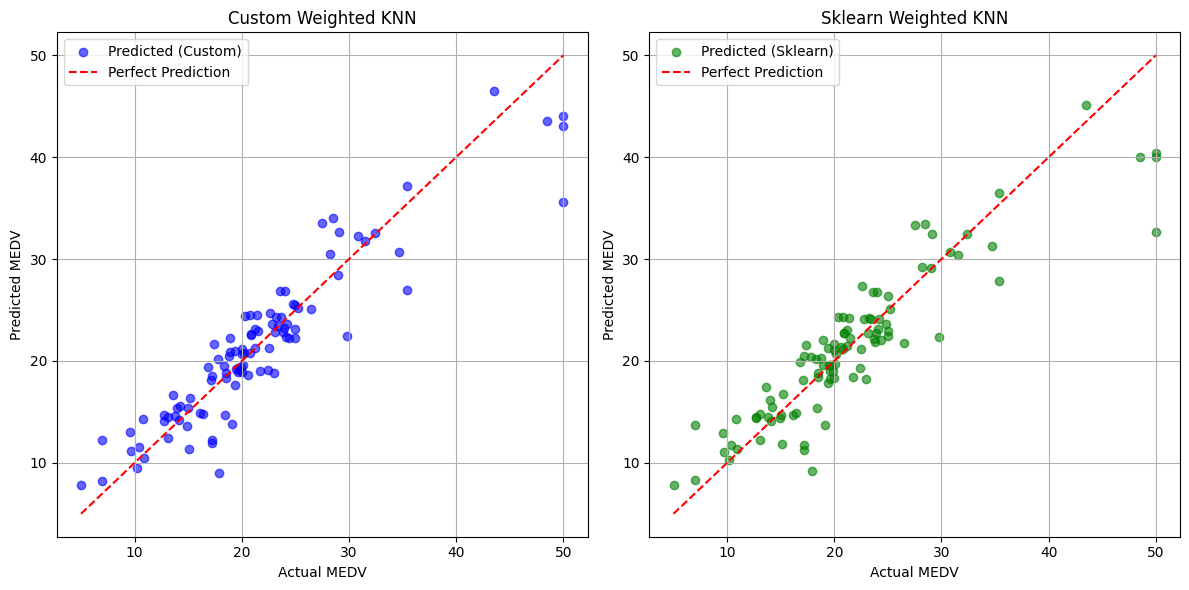

In [30]:
plt.figure(figsize=(12, 6))

# Custom implementation plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_custom, alpha=0.6, label='Predicted (Custom)', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Custom Weighted KNN')
plt.legend()
plt.grid(True)

# Sklearn implementation plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sklearn, alpha=0.6, label='Predicted (Sklearn)', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Sklearn Weighted KNN')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Task 8: Summarization

### Best Model:

The best performing configuration was found at k = 5 with cosine distance metric, achieving the highest R² score.

### My Implementation vs Scikit-learn's Model:

The R² values were identical for both my custom implementation and scikit-learn’s KNeighborsRegressor, confirming the correctness of the algorithm.
However, scikit-learn is significantly faster due to being optimized in Cython (compiling to C). My version is written in pure Python and, although it leverages NumPy for numerical operations, it still incurs overhead from Python function calls and dynamic typing.
Additionally, scikit-learn can use faster search algorithms like KD-Tree or Ball Tree for low-dimensional Euclidean spaces, while my approach is brute-force only.

### Observations Regarding Distance Metrics and Weighting:<br/>

- Cosine distance consistently outperformed Euclidean and Manhattan in this regression task, likely because the directionality of features mattered more than magnitude — which cosine captures well.

- Weighting by inverse distance generally improved prediction accuracy

- Larger k-values sometimes led to worse performance, indicating the presence of local structures in the data that are diluted when too many neighbors are included.